In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [3]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2022-10-22 18:12:03--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: ‘pytorchcv.py’

pytorchcv.py        100%[===================>]   6.22K  --.-KB/s    in 0s      

2022-10-22 18:12:04 (85.8 MB/s) - ‘pytorchcv.py’ saved [6371/6371]



In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kiranmehta","key":"0595d6b0fea91fe248cf96b333b7de40"}'}

In [5]:
!pip install -q kaggle

In [6]:
!mkdir -p ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
'chmod 600 /root/.kaggle/kaggle.json'

'chmod 600 /root/.kaggle/kaggle.json'

In [9]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 96% 746M/778M [00:05<00:00, 175MB/s]
100% 778M/778M [00:05<00:00, 145MB/s]


In [10]:
!ls

covid19-radiography-database.zip  kaggle.json  pytorchcv.py  sample_data


In [11]:
!unzip covid19-radiography-database.zip 

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [12]:
!ls

covid19-radiography-database.zip  kaggle.json	sample_data
COVID-19_Radiography_Dataset	  pytorchcv.py


In [13]:
# COVID -> 0
# Lung Opacity -> 1
# Noraml -> 2
# Viral Pneumoniua -> 3
metaData = [ '/content/COVID-19_Radiography_Dataset/COVID/images/',
            '/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/',
            '/content/COVID-19_Radiography_Dataset/Normal/images/',
            '/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/']
metaDataPath = []
metaDataLabels = []
itr = 0
for path in metaData:
    for file in os.listdir(path):
        metaDataPath.append(path+file)
        metaDataLabels.append(itr)
    itr=itr+1

In [14]:
ds = {'path':metaDataPath,'label':metaDataLabels}

In [15]:
data = pd.DataFrame.from_dict(ds)
data.tail()

,path,label
21160,/content/COVID-19_Radiography_Dataset/Viral Pn...,3
21161,/content/COVID-19_Radiography_Dataset/Viral Pn...,3
21162,/content/COVID-19_Radiography_Dataset/Viral Pn...,3
21163,/content/COVID-19_Radiography_Dataset/Viral Pn...,3
21164,/content/COVID-19_Radiography_Dataset/Viral Pn...,3


In [16]:
data.to_csv('/content/covid19.csv')

In [17]:
df = pd.DataFrame()
df['Covid 19 Detection'] = ['COVID','Lung Opacity','Normal','Viral Pneumonia']
covid_count = []
for i in range(4):
    gc = len(data[data['label']==i]) 
    covid_count.append(gc)
df['count'] = covid_count[:]
df

,Covid 19 Detection,count
0,COVID,3616
1,Lung Opacity,6012
2,Normal,10192
3,Viral Pneumonia,1345


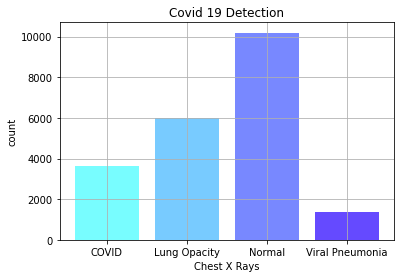

In [18]:
x = list(np.arange(4))
y = list(df['count'])
plt.bar(x,y,color=['#78fdff','#78cbff','#7888ff','#654aff'])
plt.grid()
plt.xticks(x,list(df['Covid 19 Detection']))
plt.xlabel('Chest X Rays')
plt.ylabel('count')
plt.title('Covid 19 Detection')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_dummy, y_train, y_dummy = train_test_split(data['path'],data['label'],test_size=0.25,random_state=10)
x_test, x_val, y_test, y_val = train_test_split(x_dummy,y_dummy,test_size=0.05,random_state=10)

In [20]:
x_train.shape

(15873,)

In [21]:
x_val.shape

(265,)

In [22]:
x_test.shape

(5027,)

In [23]:
type(x_train)

pandas.core.series.Series

In [24]:
train_data = pd.concat([x_train,y_train],axis=1)
train_data.head()

,path,label
19184,/content/COVID-19_Radiography_Dataset/Normal/i...,2
15906,/content/COVID-19_Radiography_Dataset/Normal/i...,2
17320,/content/COVID-19_Radiography_Dataset/Normal/i...,2
11480,/content/COVID-19_Radiography_Dataset/Normal/i...,2
4129,/content/COVID-19_Radiography_Dataset/Lung_Opa...,1


In [25]:
val_data = pd.concat([x_val,y_val],axis=1)
val_data.head()

,path,label
12984,/content/COVID-19_Radiography_Dataset/Normal/i...,2
14226,/content/COVID-19_Radiography_Dataset/Normal/i...,2
21106,/content/COVID-19_Radiography_Dataset/Viral Pn...,3
6433,/content/COVID-19_Radiography_Dataset/Lung_Opa...,1
936,/content/COVID-19_Radiography_Dataset/COVID/im...,0


In [26]:
test_data = pd.concat([x_test,y_test],axis=1)
test_data.head()

,path,label
6780,/content/COVID-19_Radiography_Dataset/Lung_Opa...,1
6436,/content/COVID-19_Radiography_Dataset/Lung_Opa...,1
3422,/content/COVID-19_Radiography_Dataset/COVID/im...,0
5572,/content/COVID-19_Radiography_Dataset/Lung_Opa...,1
1304,/content/COVID-19_Radiography_Dataset/COVID/im...,0


In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import cv2

In [28]:
class CovidDataset(Dataset):
  def __init__(self,data,transforms=None):
    self.data = data
    self.transforms = transforms
  def __len__(self):
    return len(self.data)
  def __getitem__(self,idx):
    img_name = str(self.data.iloc[idx,0])
    image = cv2.imread(img_name)
    image = Image.fromarray(image)
    #image = image.resize((256, 256,3))
    label = torch.tensor(int(self.data.iloc[idx,1]))
    if self.transforms:
      image = self.transforms(image)
    return (image,label)

In [29]:
from torchvision import transforms
transform = transforms.Compose([transforms.Resize(256),
                                        transforms.RandomResizedCrop(224),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485 , 0.456 ,0.406] ,[0.229 , 0.224 , 0.225])])

In [30]:
train_dataset = CovidDataset(data=train_data,transforms=transform)
val_dataset = CovidDataset(data=val_data,transforms=transform)
test_dataset = CovidDataset(data=test_data,transforms=transform)

In [31]:
batch_size = 10
train_dataloader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

In [32]:
import torchvision
model = torchvision.models.vgg16_bn(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [33]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [35]:
num_features = model.classifier[6].in_features
features = list(model.classifier.children())[:-1]
features.extend([nn.Linear(num_features, 4)])
model.classifier= nn.Sequential(*features)

In [36]:
model = model.to(device)

In [37]:
import torch.optim as optim
from torch.optim import lr_scheduler
optimizer= optim.Adam(model.parameters(),lr = 0.001)
scheduler = lr_scheduler.StepLR(optimizer,step_size =7,gamma=0.1)

In [38]:
loss_fn = nn.CrossEntropyLoss()

In [39]:
import copy
def trainEpoch(model,dataloader,lr,optimizer,loss_fn):
  total_loss,total_acc,count = 0.0,0.0,0
  model.train()
  for x,y in dataloader:
    #print(type(x))
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    outputs = model(x)
    _, preds = torch.max(outputs , 1)
    loss = loss_fn(outputs,y)
    loss.backward()
    optimizer.step()
    total_acc+=(preds==y).sum()
    total_loss+=loss
    count+=len(y)
  return total_loss.item()/count, total_acc.item()/count

In [40]:
def validateEpoch(model,dataloader,loss_fn):
  total_loss,total_acc,count = 0.0,0.0,0
  model.eval()
  with torch.no_grad():
    for x,y in dataloader:
      x = x.to(device)
      y = y.to(device)
      outputs = model(x)
      _, preds = torch.max(outputs , 1)
      loss = loss_fn(outputs,y)
      total_acc+=(preds==y).sum()
      total_loss+=loss
      count+=len(y)
  return total_loss.item()/count, total_acc.item()/count

In [41]:
def train(model,train_dataloader,val_dataloader,lr,optimizer,loss_fn,scheduler,epochs):
  best_acc = 0.0
  best_model_wts = copy.deepcopy(model.state_dict())
  res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
  for ep in range(epochs):
      tl,ta = trainEpoch(model,train_dataloader,lr,optimizer,loss_fn)
      vl,va = validateEpoch(model,val_dataloader,loss_fn)
      print(f"Epoch {ep:2}, Train acc={ta:.3f}, Val acc={va:.3f}, Train loss={tl:.3f}, Val loss={vl:.3f}")
      res['train_loss'].append(tl)
      res['train_acc'].append(ta)
      res['val_loss'].append(vl)
      res['val_acc'].append(va)
      if va > best_acc:
        best_acc = va
        best_model_wts = copy.deepcopy(model.state_dict())
      scheduler.step()
  return res,best_model_wts

In [42]:
type(train_dataset[0])

tuple

In [43]:
hist, best_model = train(model,train_dataloader,val_dataloader,0.001,optimizer,loss_fn,scheduler,10)

Epoch  0, Train acc=0.550, Val acc=0.577, Train loss=0.112, Val loss=0.104
Epoch  1, Train acc=0.604, Val acc=0.630, Train loss=0.101, Val loss=0.095
Epoch  2, Train acc=0.630, Val acc=0.623, Train loss=0.092, Val loss=0.089
Epoch  3, Train acc=0.648, Val acc=0.657, Train loss=0.089, Val loss=0.084
Epoch  4, Train acc=0.659, Val acc=0.679, Train loss=0.087, Val loss=0.082
Epoch  5, Train acc=0.676, Val acc=0.698, Train loss=0.081, Val loss=0.075
Epoch  6, Train acc=0.683, Val acc=0.725, Train loss=0.079, Val loss=0.073
Epoch  7, Train acc=0.719, Val acc=0.740, Train loss=0.071, Val loss=0.067
Epoch  8, Train acc=0.730, Val acc=0.717, Train loss=0.069, Val loss=0.070
Epoch  9, Train acc=0.738, Val acc=0.743, Train loss=0.067, Val loss=0.064


In [44]:
def plot_results(hist):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(hist['train_acc'], label='Training acc')
    plt.plot(hist['val_acc'], label='Validation acc')
    plt.legend()
    plt.subplot(122)
    plt.plot(hist['train_loss'], label='Training loss')
    plt.plot(hist['val_loss'], label='Validation loss')
    plt.legend()

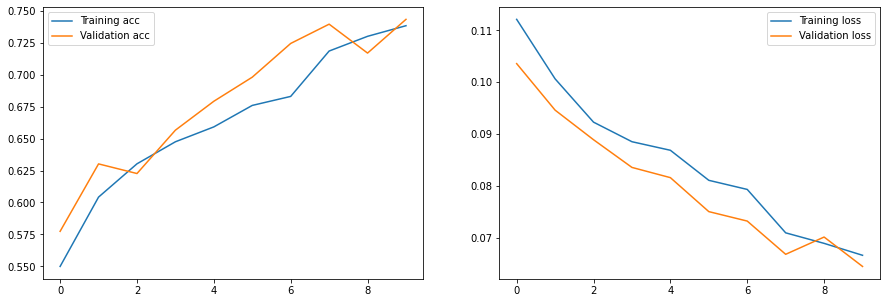

In [45]:
plot_results(hist)

In [97]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import tqdm
def testing(model,dataloader):
  y_pred_list = []
  y_true_list = []
  with torch.no_grad():
    for x_batch, y_batch in dataloader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_test_pred = model(x_batch)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())
  print(y_true_list[0])
  y_pred_list = [i[0] for i in y_pred_list]
  y_true_list = [i[0] for i in y_true_list]
  return y_pred_list,y_true_list

In [114]:
train_preds,train_actual = testing(model,train_dataloader)
test_preds,test_actual = testing(model,test_dataloader)

[2 0 1 1 1 0 2 1 1 2]
[2 0 1 2 2 0 0 2 1 0]


In [83]:
ans = validateEpoch(model,test_dataloader,loss_fn)

In [84]:
ans

(0.06109815225322322, 0.7668589616073205)

In [115]:
from sklearn.metrics import classification_report
print(classification_report(train_preds,train_actual))

              precision    recall  f1-score   support

           0       0.42      0.71      0.52       156
           1       0.76      0.70      0.73       469
           2       0.88      0.82      0.85       845
           3       0.87      0.78      0.82       118

    accuracy                           0.77      1588
   macro avg       0.73      0.75      0.73      1588
weighted avg       0.80      0.77      0.78      1588



In [116]:
print(classification_report(test_preds,test_actual))

              precision    recall  f1-score   support

           0       0.37      0.57      0.45        58
           1       0.77      0.70      0.74       168
           2       0.87      0.81      0.84       250
           3       0.74      0.74      0.74        27

    accuracy                           0.74       503
   macro avg       0.69      0.71      0.69       503
weighted avg       0.77      0.74      0.75       503



References:

[1] https://github.com/rahul1-bot/Covid-chest-Image-classification-from-Deep-Residual-Networks/blob/main/covid_code.py

[2] https://towardsdatascience.com/pytorch-vision-multiclass-image-classification-531025193aa

[3] https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5

[4] https://towardsdatascience.com/how-to-load-a-custom-image-dataset-on-pytorch-bf10b2c529e0

[5] https://web.microsoftstream.com/video/1f76f7da-f3c1-4c4f-ade8-091ccdd28c27?list=user&userId=e6fa3936-b55e-477e-bd69-f4c3dd33e956

[6] https://learn.microsoft.com/en-us/training/modules/intro-computer-vision-pytorch/

[7] https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database/code